In [61]:
import pandas as pd

df = pd.read_csv("../data/biota/table_S15.csv")
df = df.drop("Unnamed: 0", axis=1)
df = df.set_index("taxonomy")
df = df.transpose()
df.index.name = "Participant_ID"
df.head()

taxonomy,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Comamonadaceae;Tepidimonas,Bacteria;Firmicutes;Clostridia;Clostridiales;Christensenellaceae;Christensenellaceae R 7 group,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella,Bacteria;Firmicutes;Clostridia;Clostridiales;Family XIII;Family XIII AD3011 group,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminiclostridium,Bacteria;Proteobacteria;Gammaproteobacteria;Run SP154,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Frederiksenia,Bacteria;Actinobacteria;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Corynebacterium 1,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Moraxella,Bacteria;Firmicutes;Clostridia;Clostridiales;Peptococcaceaencultured,...,Bacteria;Firmicutes;Bacilli;Lactobacillales;Lactobacillaceae;Lactobacillus,Bacteria;Actinobacteria;Actinobacteria;Pseudonocardiales;Pseudonocardiaceae;Actinomycetospora,Bacteria;Firmicutes;Clostridia;Clostridiales;Clostridiales vadinBB60 group,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella,Bacteria;Tenericutes;Mollicutes;Mollicutes RF9,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcus 1,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Roseburia,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceaencultured,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcaceae UCG 014
Participant_ID,,,,,,,,,,,,,,,,,,,,,
C3002,0,0,0,1,2,0,0,8,0,12,...,0,0,0,0,0,0,481,0,0,0
C3003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16,0,0,0
C3004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,117,0,0,0
C3005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,63,0,0,0
C3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,134,0,0,0


In [62]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaling', Normalizer()), ('pca', PCA(n_components=50))])
pipeline.fit(df.values)
pipeline.steps[1][1].explained_variance_

array([0.13474555, 0.10965102, 0.07453234, 0.02984735, 0.02302282,
       0.02043542, 0.01665501, 0.01397089, 0.013465  , 0.0132139 ,
       0.01190779, 0.01160395, 0.01120617, 0.01088979, 0.00993562,
       0.00850846, 0.008009  , 0.00694084, 0.00642008, 0.00632934,
       0.00541338, 0.0052789 , 0.0046002 , 0.00401825, 0.00395339,
       0.00367743, 0.00293931, 0.00272078, 0.00250606, 0.00236462,
       0.0022327 , 0.00202554, 0.0018483 , 0.00164694, 0.00150507,
       0.00142941, 0.00133972, 0.00117654, 0.00094006, 0.00085658,
       0.00084528, 0.00072223, 0.00067671, 0.00065499, 0.00060496,
       0.00046865, 0.00041792, 0.00038073, 0.00036431, 0.00034271])

In [77]:
meta = pd.read_csv("../data/biota/IBD_metadata.csv")
meta = meta.set_index("Participant_ID")
meta = meta.join(df)
meta.head()

,External_ID,Biopsy_location,Diagnosis,Gender,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Comamonadaceae;Tepidimonas,Bacteria;Firmicutes;Clostridia;Clostridiales;Christensenellaceae;Christensenellaceae R 7 group,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella,Bacteria;Firmicutes;Clostridia;Clostridiales;Family XIII;Family XIII AD3011 group,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminiclostridium,Bacteria;Proteobacteria;Gammaproteobacteria;Run SP154,...,Bacteria;Firmicutes;Bacilli;Lactobacillales;Lactobacillaceae;Lactobacillus,Bacteria;Actinobacteria;Actinobacteria;Pseudonocardiales;Pseudonocardiaceae;Actinomycetospora,Bacteria;Firmicutes;Clostridia;Clostridiales;Clostridiales vadinBB60 group,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella,Bacteria;Tenericutes;Mollicutes;Mollicutes RF9,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcus 1,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Roseburia,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceaencultured,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcaceae UCG 014
Participant_ID,,,,,,,,,,,,,,,,,,,,,
C3002,206618,Sigmoid Colon,CD,Female,0,0,0,1,2,0,...,0,0,0,0,0,0,481,0,0,0
C3003,206622,Sigmoid Colon,UC,Female,0,0,0,0,0,0,...,0,0,0,0,0,0,16,0,0,0
C3004,206625,Sigmoid Colon,UC,Female,0,0,0,0,0,0,...,0,0,0,0,0,0,117,0,0,0
C3005,206628,Rectum,UC,Female,0,0,0,0,0,0,...,0,0,0,0,0,0,63,0,0,0
C3006,206630,Rectum,UC,Male,0,0,0,0,0,0,...,0,0,0,0,0,0,134,0,0,0


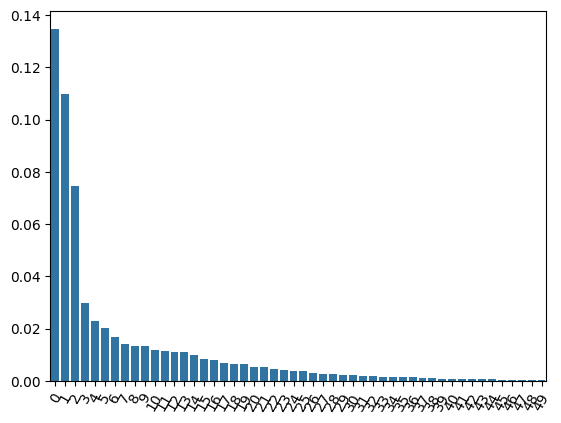

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(pipeline.steps[1][1].explained_variance_)

ax = plt.gca()
ax.tick_params(axis='x', rotation=60)


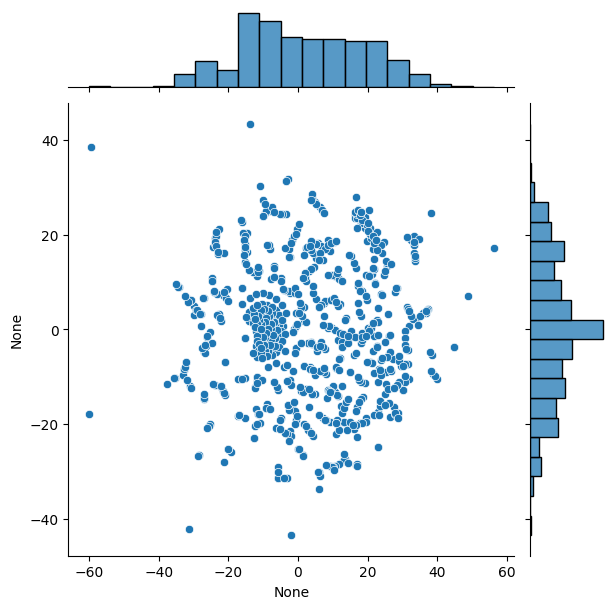

In [65]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=50)
tsne_data = tsne.fit_transform(np.transpose(df.values))

sns.jointplot(x=tsne_data[:, 0], y=tsne_data[:, 1], kind='scatter')

for line in range(0,tsne_data.shape[0]):
     p1.text(tsne_data[line, ]+0.01, df_iris.sepal_width[line], 
     df_iris.species[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

In [51]:
df.columns

Index(['C3002', 'C3003', 'C3004', 'C3005', 'C3006', 'C3011', 'C3015', 'C3016',
       'C3017', 'C3021', 'C3022', 'C3023', 'C3027', 'C3029', 'C3030', 'C3031',
       'C3032', 'C3034', 'C3035', 'C3037', 'H4001', 'H4004', 'H4006', 'H4007',
       'H4008', 'H4009', 'H4010', 'H4013', 'H4014', 'H4015', 'H4016', 'H4017',
       'H4018', 'H4019', 'H4020', 'H4022', 'H4023', 'H4024', 'H4028', 'H4031',
       'H4035', 'H4038', 'H4040', 'H4042', 'H4043', 'H4044', 'H4045', 'M2008',
       'M2014', 'M2021', 'M2025', 'M2026', 'M2027', 'M2028', 'M2034', 'M2039',
       'M2041', 'M2042', 'M2047', 'M2060', 'M2061', 'M2064', 'M2068', 'M2069',
       'M2072', 'M2075', 'M2084', 'P6005', 'P6009', 'P6012', 'P6013', 'P6014',
       'P6016', 'P6017', 'P6018', 'P6024', 'P6025', 'P6028'],
      dtype='object')